## Importing the libraries 

In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sb

## Reading the dataset 

In [3]:
df= pd.read_csv('news.csv')
df.head(3)

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL

In [4]:
labels=df.label
labels.unique()       # no.of unique values in the output column of the dataset df

array(['FAKE', 'REAL'], dtype=object)

## Preprocessing  and splitting the dataset 

In [5]:
# Splitting the dataset into 20% testing data and 80% training data
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer     # importing the function from the library 

#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)


## Passive Aggressive Classifier

In [7]:
from sklearn.linear_model import PassiveAggressiveClassifier     

In [95]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=100)
pac.fit(tfidf_train,y_train)
accuracy=[]
#DataFlair - Predict on the test set and calculate accuracy
for i in range(10):
    y_pred_pac = pac.predict(tfidf_test)
    accuracy.append(accuracy_score(y_test,y_pred_pac))
score = np.mean(accuracy)
score = round(score*100,2)
print(f'Accuracy: {score}%')

#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred_pac, labels=['FAKE','REAL'])

Accuracy: 93.05%


array([[591,  47],
       [ 41, 588]], dtype=int64)

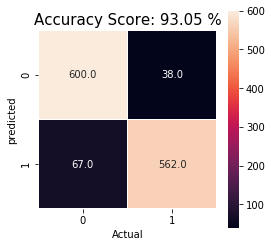

In [96]:
plt.figure(figsize=(4,4))
sb.heatmap(confusion_matrix(y_test,y_pred_LR),annot=True,fmt='.1f',linewidths=0.9,square=(2,2))
plt.xlabel('Actual')
plt.ylabel('predicted')
all_sample_title = 'Accuracy Score: {0} %'.format(score)
plt.title(all_sample_title,size=15);

## SVM 

In [97]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(tfidf_train, y_train) 
y_pred_svm =clf.predict(tfidf_test)

score1=accuracy_score(y_test,y_pred_svm)
score1=round(score1*100,2)
print(f'Accuracy: {score1}%')

#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred_svm, labels=['FAKE','REAL'])

Accuracy: 92.9%


array([[605,  33],
       [ 57, 572]], dtype=int64)

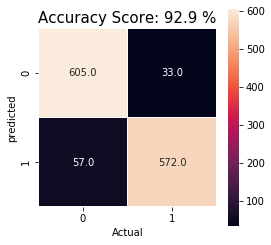

In [98]:
plt.figure(figsize=(4,4))
sb.heatmap(confusion_matrix(y_test,y_pred_svm),annot=True,fmt='.1f',linewidths=0.9,square=(2,2))
plt.xlabel('Actual')
plt.ylabel('predicted')
all_sample_title = 'Accuracy Score: {0} %'.format(score1)
plt.title(all_sample_title,size=15);

## K-Nearest Neighbour 

In [102]:
from sklearn.neighbors import KNeighborsClassifier
clusters=[]
accuracy=[]
for i in range(100,150):
    knn = KNeighborsClassifier(n_neighbors=i)        # creating an object
    knn.fit(tfidf_train,y_train)
    y_pred_knn = knn.predict(tfidf_test)
    clusters.append(i)
    accuracy.append(accuracy_score(y_test,y_pred_knn))
print(clusters)
print(accuracy)
print(max(accuracy))

[100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
[0.8445146014206788, 0.846093133385951, 0.8453038674033149, 0.8453038674033149, 0.8429360694554064, 0.8389897395422258, 0.840568271507498, 0.8366219415943172, 0.8374112075769534, 0.840568271507498, 0.8366219415943172, 0.8397790055248618, 0.8382004735595896, 0.840568271507498, 0.8397790055248618, 0.8476716653512234, 0.8429360694554064, 0.846093133385951, 0.8453038674033149, 0.850828729281768, 0.8492501973164956, 0.8524072612470402, 0.8516179952644041, 0.8531965272296764, 0.8500394632991318, 0.8484609313338595, 0.8484609313338595, 0.8484609313338595, 0.8500394632991318, 0.8476716653512234, 0.8453038674033149, 0.8492501973164956, 0.8437253354380426, 0.8445146014206788, 0.8413575374901342, 0.8453038674033149, 0.8445146014206788, 0.843725335438

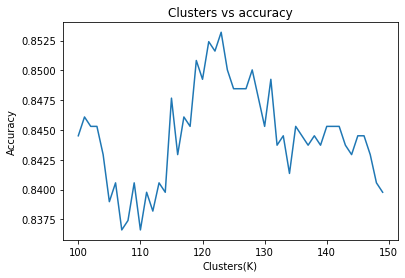

In [103]:
plt.title('Clusters vs accuracy')
plt.xlabel('Clusters(K)')
plt.ylabel('Accuracy')
plt.plot(clusters,accuracy)
plt.show()


In [104]:
accuracy[23]

0.8531965272296764

In [105]:
score2  = round((accuracy[23])*100,2)

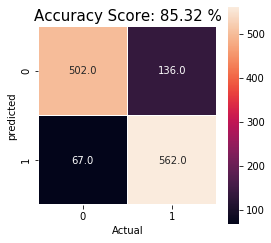

In [106]:
plt.figure(figsize=(4,4))
sb.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True,fmt='.1f',linewidths=0.9,square=(2,2))
plt.xlabel('Actual')
plt.ylabel('predicted')
all_sample_title = 'Accuracy Score: {0} %'.format(score2)
plt.title(all_sample_title,size=15);

## Decision Tree 

In [62]:
from sklearn.tree import DecisionTreeClassifier               # importing the required libraries 
from sklearn.tree import export_graphviz  
from sklearn.externals.six import StringIO

from IPython.display import Image 
import pydotplus


In [107]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(tfidf_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [108]:
dot_data = StringIO()                                  # creating an object 
export_graphviz(tree,out_file=dot_data,                # exporting graph with few functions 
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())     # creating a empty graph 
Image(graph.create_png(),width=800,height=1000)    

In [117]:
y_pred_tree = tree.predict(tfidf_test)
score3 = round(accuracy_score(y_test,y_pred_tree)*100,2)
print(f'Accuracy Score: {score3} %')

Accuracy Score: 81.14 %


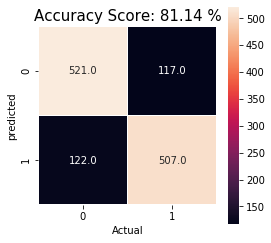

In [118]:
plt.figure(figsize=(4,4))
sb.heatmap(confusion_matrix(y_test,y_pred_tree),annot=True,fmt='.1f',linewidths=0.9,square=(2,2))
plt.xlabel('Actual')
plt.ylabel('predicted')
all_sample_title = 'Accuracy Score: {0} %'.format(score3)
plt.title(all_sample_title,size=15);

In [77]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)  # here the maximum depth is given as 5
tree.fit(tfidf_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

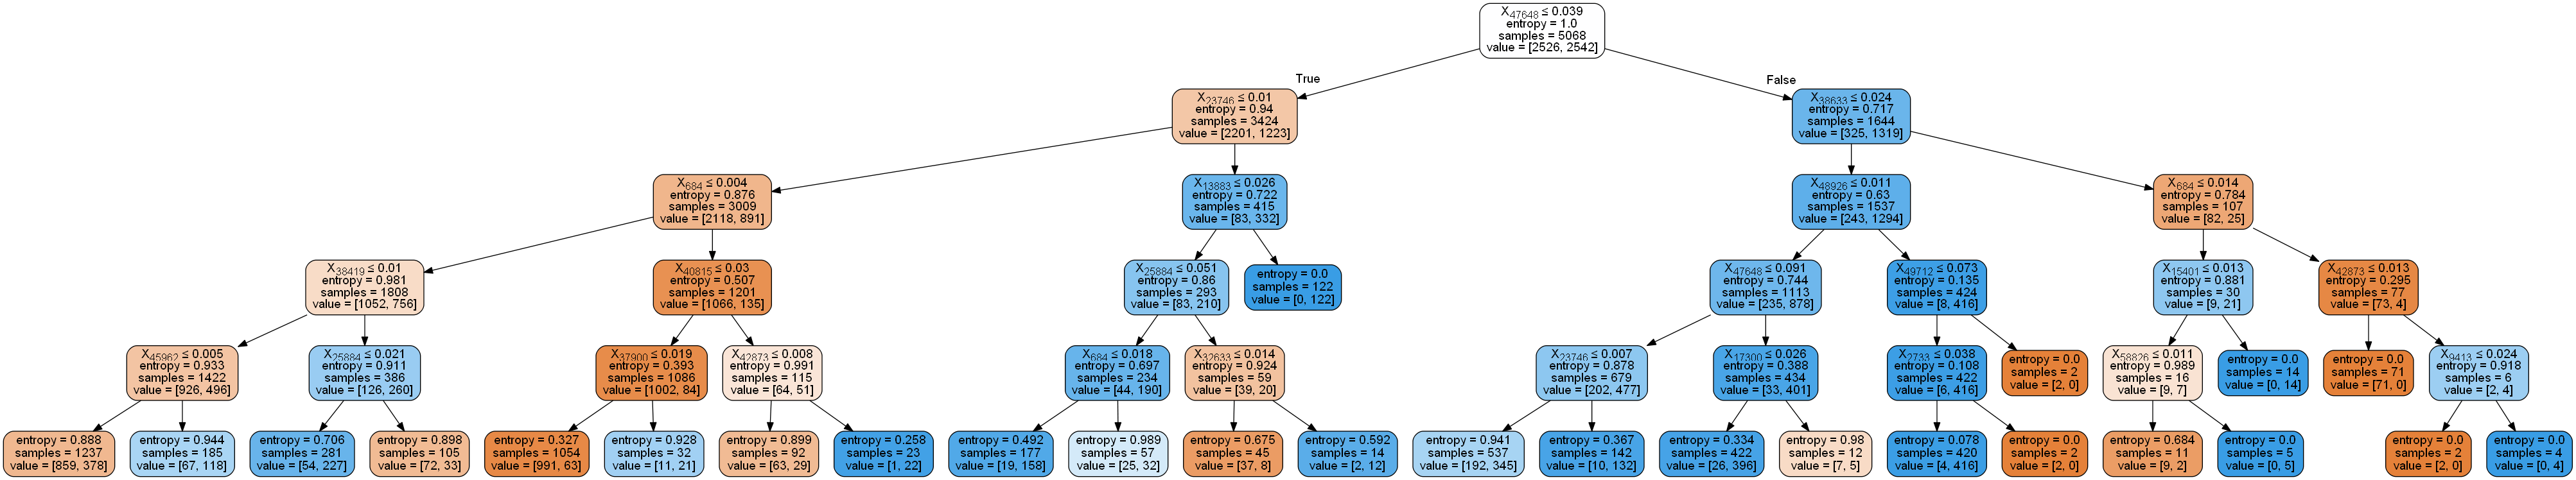

In [78]:
dot_data = StringIO()                                  # creating an object 
export_graphviz(tree,out_file=dot_data,                # exporting graph with few functions 
               filled=True,rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())     # creating a empty graph 
Image(graph.create_png(),width=800,height=1000)    

In [79]:
y_pred_tree = tree.predict(tfidf_test)
print('Accuracy : ',accuracy_score(y_test,y_pred_tree))


Accuracy :  0.7995264404104183


## Logistic Regression 

In [123]:
from sklearn import linear_model
regress = linear_model.LogisticRegression()  

In [124]:
regress.fit(tfidf_train,y_train)
y_pred_LR = regress.predict(tfidf_test)
score4 = round(accuracy_score(y_pred_LR,y_test)*100,2)
print(f'Accuracy Score : {score4} %')

Accuracy Score : 91.71 %


In [125]:
print('Confustion Matrix\n ',confusion_matrix(y_pred_LR,y_test))

Confustion Matrix
  [[600  67]
 [ 38 562]]


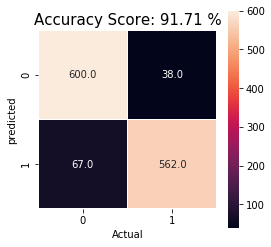

In [126]:
plt.figure(figsize=(4,4))
sb.heatmap(confusion_matrix(y_test,y_pred_LR),annot=True,fmt='.1f',linewidths=0.9,square=(2,2))
plt.xlabel('Actual')
plt.ylabel('predicted')
all_sample_title = 'Accuracy Score: {0} %'.format(score4)
plt.title(all_sample_title,size=15);

## Conclusion 

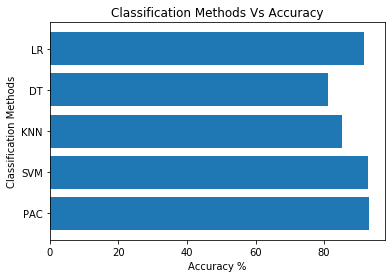

In [142]:
scores = [score,score1,score2,score3,score4]
class_methods = ['PAC','SVM','KNN','DT','LR']
plt.title('Classification Methods Vs Accuracy')
plt.xlabel('Accuracy %')
plt.ylabel('Classification Methods')
#plt.ylim()
plt.barh(class_methods,scores)
plt.show()